Q1) Create a copy of the ‘data.csv’ and name the dataframe as dataset1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data.csv")
dataset1 = df.copy(deep=True)

In [3]:
dataset1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,NaN,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,70000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,NaN,37.0,67000.0,Yes


Q2) To display the count of each value in the country column

In [4]:
dataset1['Country'].value_counts()

Germany    3
Spain      3
France     3
Name: Country, dtype: int64

Q3) To display how many individuals from each country are buying the
product and how many aren’t.

In [5]:
dataset1['Purchased'].replace('Yes',1,inplace=True)
dataset1['Purchased'].replace('No',0,inplace=True)

In [6]:
dataset1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,NaN,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,70000.0,1
5,France,35.0,58000.0,1
6,Spain,NaN,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,NaN,37.0,67000.0,1


In [7]:
ans = dataset1.groupby(['Country','Purchased']).size()
ans

Country  Purchased
France   0            1
         1            2
Germany  0            2
         1            1
Spain    0            2
         1            1
dtype: int64

Q4) Show all probabilities of occurance:
i) Joint
ii) Marginal
iii) Conditional:
A) Country is known, whether the individual will purchase the
product or not
B) Product has been brought/not brought, find the probability the
individual belongs to which country

In [8]:
# A : (i)
pd.crosstab(index = dataset1['Country'],columns = dataset1['Purchased'],normalize=True,dropna = True)

Purchased,0,1
Country,,
France,0.111111,0.222222
Germany,0.222222,0.111111
Spain,0.222222,0.111111


In [9]:
# A : (ii)
pd.crosstab(index = dataset1['Country'],columns = dataset1['Purchased'],margins = True,normalize=True,dropna = True)

Purchased,0,1,All
Country,,,
France,0.111111,0.222222,0.333333
Germany,0.222222,0.111111,0.333333
Spain,0.222222,0.111111,0.333333
All,0.555556,0.444444,1.000000


In [10]:
# # A : (iii)
pd.crosstab(index = dataset1['Country'],columns = dataset1['Purchased'],normalize='index',margins = True,dropna = True)

Purchased,0,1
Country,,
France,0.333333,0.666667
Germany,0.666667,0.333333
Spain,0.666667,0.333333
All,0.555556,0.444444


In [11]:
# B : (i)
pd.crosstab(index = dataset1['Purchased'],columns = dataset1['Country'],normalize=True,dropna = True)

Country,France,Germany,Spain
Purchased,,,
0,0.111111,0.222222,0.222222
1,0.222222,0.111111,0.111111


In [12]:
# B : (ii)
pd.crosstab(index = dataset1['Purchased'],columns = dataset1['Country'],normalize=True,dropna = True,margins = True)

Country,France,Germany,Spain,All
Purchased,,,,
0,0.111111,0.222222,0.222222,0.555556
1,0.222222,0.111111,0.111111,0.444444
All,0.333333,0.333333,0.333333,1.000000


In [13]:
# B : (iii)
pd.crosstab(index = dataset1['Purchased'],columns = dataset1['Country'],normalize='index',dropna = True,margins=True)

Country,France,Germany,Spain
Purchased,,,
0,0.200000,0.400000,0.400000
1,0.500000,0.250000,0.250000
All,0.333333,0.333333,0.333333


Q5) Find out whether there is a correlation between numerical
data(variables) in the dataset.

In [15]:
import numpy as np

In [16]:
count = np.array(dataset1['Country'].unique())

for n,i in enumerate(count):
    dataset1['Country'].replace(i,n,inplace = True)
    
print(dataset1.corr())

            Country       Age    Salary  Purchased
Country    1.000000 -0.156916  0.124821   0.000000
Age       -0.156916  1.000000  0.977128  -0.212359
Salary     0.124821  0.977128  1.000000  -0.115905
Purchased  0.000000 -0.212359 -0.115905   1.000000


Q6) Use scatter plot and plot the data given in
‘social_network_ad.csv’.Keep ‘age’ in x-axis and ‘estimated salary’ in y-
axis.

In [17]:
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('Social_Network_Ads.csv')

In [19]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


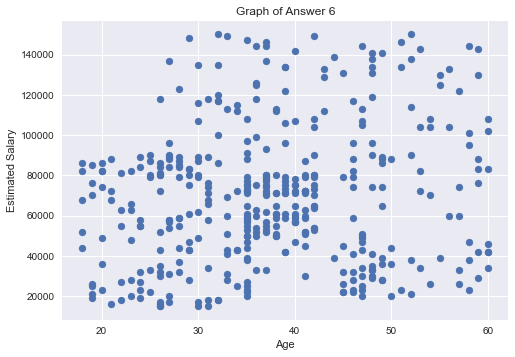

In [22]:
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.style.use('seaborn')
plt.title('Graph of Answer 6')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.show()